# DNA sequence analysis of Tumor Supressor

## Install Necessary libraries and read the GTF and FASTA files for the human genome

In [9]:
## Download the human genome in compressed FASTA format (.fa.gz.)
!wget ftp://ftp.ensembl.org/pub/release-110/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz

--2025-10-29 00:38:34--  ftp://ftp.ensembl.org/pub/release-110/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz
           => ‘Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz.1’
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.169|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/release-110/fasta/homo_sapiens/dna ... done.
==> SIZE Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz ... 881964081
==> PASV ... done.    ==> RETR Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz ... done.
Length: 881964081 (841M) (unauthoritative)

Homo_sapiens.GRCh38 100%[===================>] 841.11M  29.1MB/s    in 43s     

2025-10-29 00:39:18 (19.6 MB/s) - ‘Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz.1’ saved [881964081]



In [10]:
# unzip the .gz file to get a readable .fa file
!gunzip Homo_sapiens.GRCh38.dna.primary_assembly.fa.gz

In [11]:
# Download the GTF file which annotates the genome in gene Transfer Format
!wget ftp://ftp.ensembl.org/pub/release-110/gtf/homo_sapiens/Homo_sapiens.GRCh38.110.gtf.gz

--2025-10-29 00:40:16--  ftp://ftp.ensembl.org/pub/release-110/gtf/homo_sapiens/Homo_sapiens.GRCh38.110.gtf.gz
           => ‘Homo_sapiens.GRCh38.110.gtf.gz.1’
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.169|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /pub/release-110/gtf/homo_sapiens ... done.
==> SIZE Homo_sapiens.GRCh38.110.gtf.gz ... 54325732
==> PASV ... done.    ==> RETR Homo_sapiens.GRCh38.110.gtf.gz ... done.
Length: 54325732 (52M) (unauthoritative)

Homo_sapiens.GRCh38 100%[===================>]  51.81M  29.0MB/s    in 1.8s    

2025-10-29 00:40:19 (29.0 MB/s) - ‘Homo_sapiens.GRCh38.110.gtf.gz.1’ saved [54325732]



In [12]:
# Unzip the GTF file
!gunzip Homo_sapiens.GRCh38.110.gtf.gz

gzip: Homo_sapiens.GRCh38.110.gtf already exists; do you wish to overwrite (y or n)? n
	not overwritten


In [13]:
## Install necessary libraries to read and parse the FASTA files
%%capture
! pip install Biopython

In [14]:
from Bio import SeqIO # SeqIO module is use to read and write the biological sequence files ( FASTA,GenBank)
# Fetch the records in the FASTA
for record in SeqIO.parse("Homo_sapiens.GRCh38.dna.primary_assembly.fa", "fasta"):
    print(f'chromosome ID: {record.id}')     # each record corresponds to an identifier chromosome or scaffold in human genome ( "1","2","X","Y","MT" etc)
    print(f'full ID description :{record.description}') #full ensemble style header
    print(record.seq[:100])
    print(f'sequence length: {len(record.seq)}')
    print('\n')


chromosome ID: 1
full ID description :1 dna:chromosome chromosome:GRCh38:1:1:248956422:1 REF
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
sequence length: 248956422


chromosome ID: 10
full ID description :10 dna:chromosome chromosome:GRCh38:10:1:133797422:1 REF
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
sequence length: 133797422


chromosome ID: 11
full ID description :11 dna:chromosome chromosome:GRCh38:11:1:135086622:1 REF
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
sequence length: 135086622


chromosome ID: 12
full ID description :12 dna:chromosome chromosome:GRCh38:12:1:133275309:1 REF
NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN
sequence length: 133275309


chromosome ID: 13
full ID description :13 dna:chromosome chromosome:GRCh38:13:1:114364328:1 REF
NNN

This shows GRCh38, human genome contains many unplaced genomic scaffolds. They are a DNA sequence which is part of the genome, but has not been confidently assigned to a specific location on any chromosome. These exist because some regions in the genome are hard to assemble due to repetitive sequences, structural complpexity and low sequence coverage. If analyzing novel gene discovery or strucural variations, these scaffolds are worth exploring. But since the project goal is to analyze the DNA sequence,canonical chromosomes  will be filtered.

### Filter for canonical chromosomes


In [15]:
#Filter canonical chromosomes
## Generatre a clean FASTA file with 24 main chromosomes



canonical_ids = [str(i) for i in range(1, 23)] + ["X", "Y", "MT"]


# Open the full genome FASTA file
input_file = "Homo_sapiens.GRCh38.dna.primary_assembly.fa"
output_file = "canonical_chromosomes.fa"


with open(output_file,"w") as output_handle:
    for record in SeqIO.parse(input_file, "fasta"):
        if record.id in canonical_ids:
            SeqIO.write(record, output_handle, "fasta")


# Create a dictionary to store filtered sequences
filtered_sequences = {}

# Iterate and filter
for record in SeqIO.parse(input_file, "fasta"):
    chrom_id = record.id.split()[0]  # Clean ID
    if chrom_id in canonical_ids:
        filtered_sequences[chrom_id] = record.seq
        print(f"Loaded chromosome {chrom_id} with {len(record.seq)} bases.")


Loaded chromosome 1 with 248956422 bases.
Loaded chromosome 10 with 133797422 bases.
Loaded chromosome 11 with 135086622 bases.
Loaded chromosome 12 with 133275309 bases.
Loaded chromosome 13 with 114364328 bases.
Loaded chromosome 14 with 107043718 bases.
Loaded chromosome 15 with 101991189 bases.
Loaded chromosome 16 with 90338345 bases.
Loaded chromosome 17 with 83257441 bases.
Loaded chromosome 18 with 80373285 bases.
Loaded chromosome 19 with 58617616 bases.
Loaded chromosome 2 with 242193529 bases.
Loaded chromosome 20 with 64444167 bases.
Loaded chromosome 21 with 46709983 bases.
Loaded chromosome 22 with 50818468 bases.
Loaded chromosome 3 with 198295559 bases.
Loaded chromosome 4 with 190214555 bases.
Loaded chromosome 5 with 181538259 bases.
Loaded chromosome 6 with 170805979 bases.
Loaded chromosome 7 with 159345973 bases.
Loaded chromosome 8 with 145138636 bases.
Loaded chromosome 9 with 138394717 bases.
Loaded chromosome MT with 16569 bases.
Loaded chromosome X with 156040

## Extract Tumor supressor genes ((e.g., TP53, BRCA1, BRCA2, RB1, PTEN, CDKN2A) from canonical chromosomes using reference FASTA and GTF files.


In [2]:
## Parse GTF and filter for the target genes

canonical_chroms = [str(i) for i in range(1, 23)] + ["X", "Y", "MT"]

import pandas as pd

def load_gtf(gtf_path,target_genes):
    # Use the 'comment' parameter to skip lines starting with '#'
    gtf= pd.read_csv(gtf_path, sep='\t', header=None, comment='#',dtype=str)
    gtf.columns = ['chrom', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']

    # Filter for canonical chromosomes
    gtf=gtf[gtf['chrom'].isin(canonical_chroms)]

    # extract the gene name
    gtf['gene_name']=gtf['attribute'].str.extract('gene_name "([^"]+)"')

    # return target genes
    return gtf[(gtf["feature"] == "gene") & (gtf["gene_name"].isin(target_genes))]

In [3]:
## Load FASTA and extract the sequences

from Bio import SeqIO # SeqIO module is use to read and write the biological sequence files ( FASTA,GenBank)

def extract_sequences(fasta_path,gtf_filtered):
  fasta_dict=SeqIO.to_dict(SeqIO.parse(fasta_path,"fasta"))
  gene_seqs={}

  for _,row in gtf_filtered.iterrows():
    chrom=row['chrom'] #sequence
    start=int(row['start'])-1  #0 based inidexing
    end=int(row['end'])
    strand=row['strand']
    gene=row['gene_name']

    seq=fasta_dict[chrom].seq[start:end] # extract the DNA sequence at the specific location
    if strand=='-':                     # if the gene is in negatuve strand, it reverses and complements the sequece
      seq=seq.reverse_complement()       ### Biologicaly necessary( Transcription reads templpate strand reverse)
    gene_seqs[gene]=str(seq)
  return gene_seqs

In [4]:
## extracting tumor supressor genes

target_genes = ["TP53", "BRCA1", "BRCA2", "RB1", "PTEN", "CDKN2A"]

gtf_filtered = load_gtf("Homo_sapiens.GRCh38.110.gtf", target_genes)
gene_seqs = extract_sequences("Homo_sapiens.GRCh38.dna.primary_assembly.fa", gtf_filtered)

# Save sequences
from Bio.SeqRecord import SeqRecord
from Bio.SeqIO import write
from Bio.Seq import Seq

records = [SeqRecord(Seq(seq), id=gene, description="") for gene, seq in gene_seqs.items()]
write(records, "tumor_suppressors.fa", "fasta")

6

In [5]:
with open("tumor_suppressors.fa") as f:
    print(f.read(500))

>CDKN2A
GGTTAAAACCGAAAATAAAAATGGGCTAGACACAAAGGACTCGGTGCTTGTCCCAGCCAG
GCGCCCTCGGCGACGCGGGCAGCTGGGAGGGGAATGGGCGCCCGGACCCAGCTGGGACCC
CCGGGTGCGACTCCACCTACCTAGTCCGGCGCCAGGCCGGGTCGACAGCTCCGGCAGCGC
CAGCGCCGCGCCGTGTCCAGATGTCGCGTCAGAGGCGTGCAGCGGTTTAGTTTAATTTCG
CTTGTTTTCCAAATCTAGAAGAGGAGCGGAGCGGCTTTTAGTTCAAAACTGACATTCAGC
CTCCTGATTGGCGGATAGAGCAATGAGATGACCTCGCTTTCCTTTCTTCCTTTTTCATTT
TTAAATAATCTAGTTTGAAGAATGGAAGACTTTCGACGAGGGGAGCCAGGAATAAAATAA
GGGGAATAGGGGAGCGGGGACGCGAGCAGCACCAGAATCCGCGGGAGCGCGGCTGTTCCT
GGTA


In [6]:
# Read tumor suppressor genes ( DNA sequence) from the saved .fa file

from Bio import SeqIO


gene_seqs={} # Intialize the dictionary to store the DNA sequence of tumor supressors

for record in SeqIO.parse('tumor_suppressors.fa',"fasta"):
  dna_seq = str(record.seq)
  gene_id=record.id
  gene_seqs[gene_id]=dna_seq
  print(f'Gene ID: {record.id}')
  print(f'DNA Sequence: {record.seq}')
  print('\n')


Gene ID: CDKN2A
DNA Sequence: GGTTAAAACCGAAAATAAAAATGGGCTAGACACAAAGGACTCGGTGCTTGTCCCAGCCAGGCGCCCTCGGCGACGCGGGCAGCTGGGAGGGGAATGGGCGCCCGGACCCAGCTGGGACCCCCGGGTGCGACTCCACCTACCTAGTCCGGCGCCAGGCCGGGTCGACAGCTCCGGCAGCGCCAGCGCCGCGCCGTGTCCAGATGTCGCGTCAGAGGCGTGCAGCGGTTTAGTTTAATTTCGCTTGTTTTCCAAATCTAGAAGAGGAGCGGAGCGGCTTTTAGTTCAAAACTGACATTCAGCCTCCTGATTGGCGGATAGAGCAATGAGATGACCTCGCTTTCCTTTCTTCCTTTTTCATTTTTAAATAATCTAGTTTGAAGAATGGAAGACTTTCGACGAGGGGAGCCAGGAATAAAATAAGGGGAATAGGGGAGCGGGGACGCGAGCAGCACCAGAATCCGCGGGAGCGCGGCTGTTCCTGGTAGGGCCGTGTCAGGTGACGGATGTAGCTAGGGGGCGAGCTGCCTGGAGTTGCGTTCCAGGCGTCCGGCCCCTGGGCCGTCACCGCGGGGCGCCCGCGCTGAGGGTGGGAAGATGGTGGTGGGGGTGGGGGCGCACACAGGGCGGGAAAGTGGCGGTAGGCGGGAGGGAGAGGAACGCGGGCCCTGAGCCGCCCGCGCGCGCGCCTCCCTACGGGCGCCTCCGGCAGCCCTTCCCGCGTGCGCAGGGCTCAGAGCCGTTCCGAGATCTTGGAGGTCCGGGTGGGAGTGGGGGTGGGGTGGGGGTGGGGGTGAAGGTGGGGGGCGGGCGCGCTCAGGGAAGGCGGGTGCGCGCCTGCGGGGCGGAGATGGGCAGGGGGCGGTGCGTGGGTCCCAGTCTGCAGTTAAGGGGGCAGGAGTGGCGCTGCTCACCTCTGGTGCCAAAGGGCGGCGCAGCGGCTGCCGAGCTCGGCCCTGGAGGCGGCGAGAAC

### GC content calculation

In [7]:
##  Define thee function to calculare GC content of extracted Tumor supressor genes
def gc_contet (seq):
  seq=seq.upper()
  gc_count=seq.count("G")+seq.count("C")
  return round(gc_count/len(seq)*100,2) if len(seq) > 0 else 0


In [8]:
## Apply the GC content function on the extracted tumor supressor genes "gene_seqs"

for gene, seq in gene_seqs.items():
  gc_content=gc_contet(seq)
  # Find the chromosome for the current gene in the gtf_filtered DataFrame
  chrom = gtf_filtered[gtf_filtered['gene_name'] == gene]['chrom'].iloc[0]
  print(f"{gene} (Chr {chrom}): GC content = {gc_content}%")

CDKN2A (Chr 9): GC content = 41.19%
PTEN (Chr 10): GC content = 35.85%
RB1 (Chr 13): GC content = 38.5%
BRCA2 (Chr 13): GC content = 38.2%
BRCA1 (Chr 17): GC content = 44.09%
TP53 (Chr 17): GC content = 48.85%


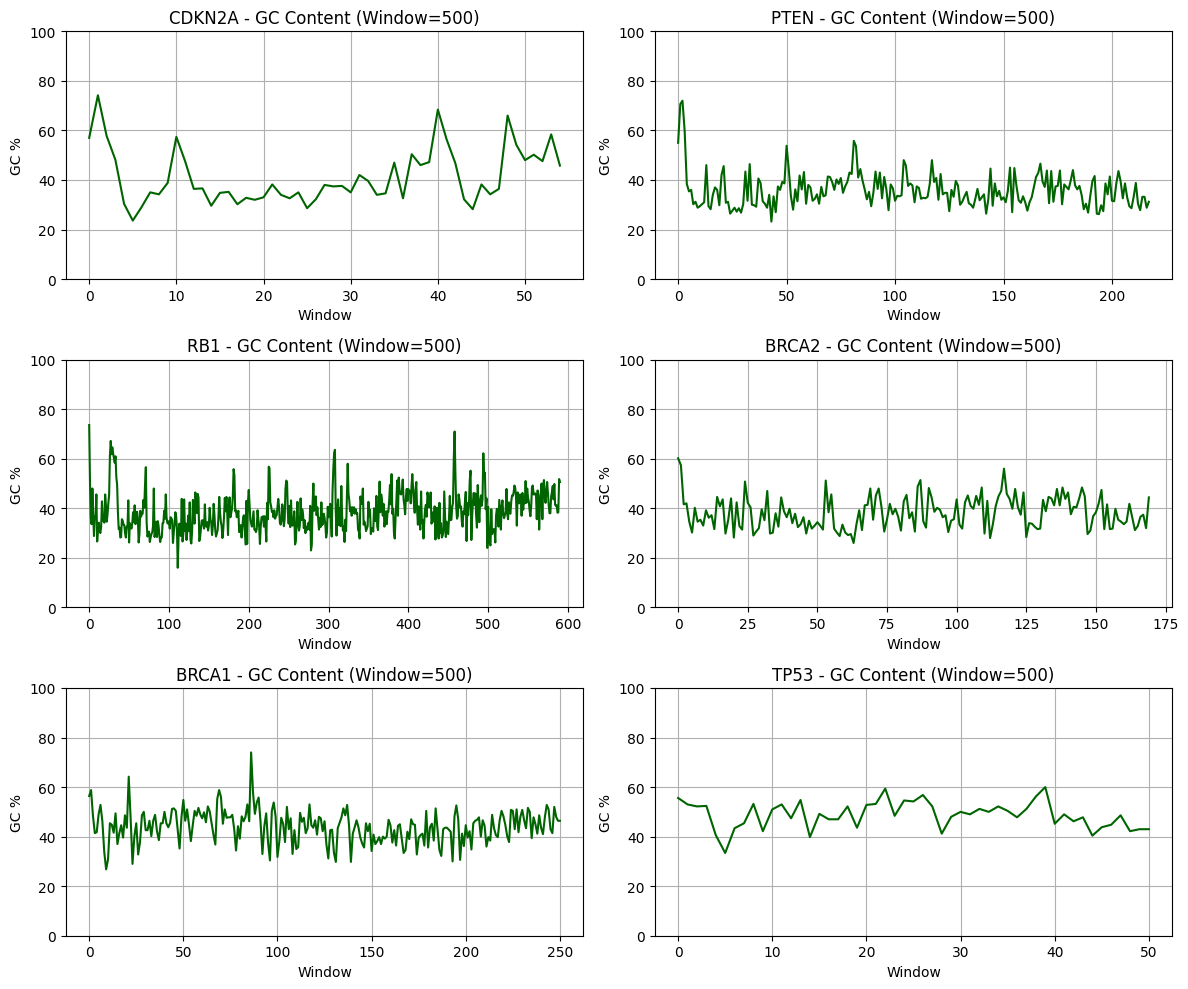

In [9]:
## Visualize GC content per gene
## sliding window GC content track shows how GC% varies along the sequence revealing the GC rich islands

import matplotlib.pyplot as plt
# Use the previously defined gc_contet function

# use gene_seqs dictioary that has saved tumor supressor genes and their DNA sequence


# Set sliding window size
window = 500

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot GC content for each gene
for idx, (gene, seq) in enumerate(gene_seqs.items()):
    gc_vals = [gc_contet(seq[i:i+window]) for i in range(0, len(seq)-window+1, window)]
    axes[idx].plot(range(len(gc_vals)), gc_vals, color='darkgreen')
    axes[idx].set_title(f"{gene} - GC Content (Window={window})")
    axes[idx].set_xlabel("Window")
    axes[idx].set_ylabel("GC %")
    axes[idx].set_ylim(0, 100)
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

| **Gene**   | **Description**                                     | **GC% Pattern Insight**                                                                                                        |
| ---------- | --------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------ |
| **CDKN2A** | Tumor suppressor controlling cell cycle.            | GC% fluctuates strongly (30–80%), suggesting variable GC-rich regions—possible regulatory elements or exon–intron transitions. |
| **PTEN**   | Regulates cell growth signaling.                    | Lower and steadier GC% (~25–50%), typical for long coding regions with moderate stability.                                     |
| **RB1**    | Retinoblastoma protein gene; cell cycle checkpoint. | High variation with many local peaks → indicates alternating GC-rich and AT-rich introns.                                      |
| **BRCA2**  | DNA repair gene.                                    | GC% mostly stable (~30–40%), showing less compositional bias.                                                                  |
| **BRCA1**  |  DNA repair gene.                            | Moderate GC% (~35–45%), with occasional peaks — could correspond to functional exons.                                          |
| **TP53**   | Guardian of the genome.                             | Generally balanced GC (~40–50%), consistent with active, conserved gene regions.                                               |


/tmp/ipython-input-3282416686.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gc_df, x='gene', y='gc_content', palette='viridis')


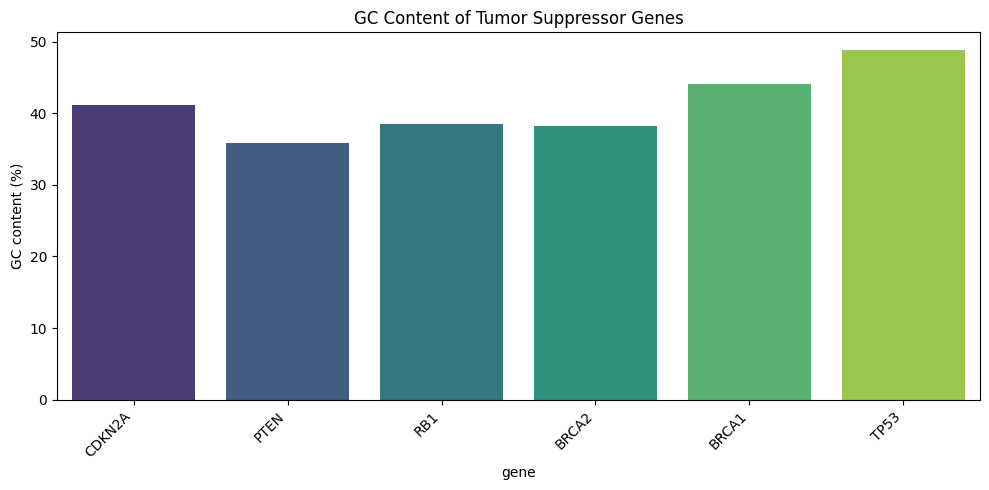

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate GC content for each gene and store in a list of dictionaries
gc_data = []
for gene, seq in gene_seqs.items():
  gc_content_value = gc_contet(seq)
  gc_data.append({'gene': gene, 'gc_content': gc_content_value})

# Create a pandas DataFrame from the GC content data
gc_df = pd.DataFrame(gc_data)

# Create the bar plot
plt.figure(figsize=(10,5))
sns.barplot(data=gc_df, x='gene', y='gc_content', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('GC content (%)')
plt.title('GC Content of Tumor Suppressor Genes')
plt.tight_layout()
plt.show()

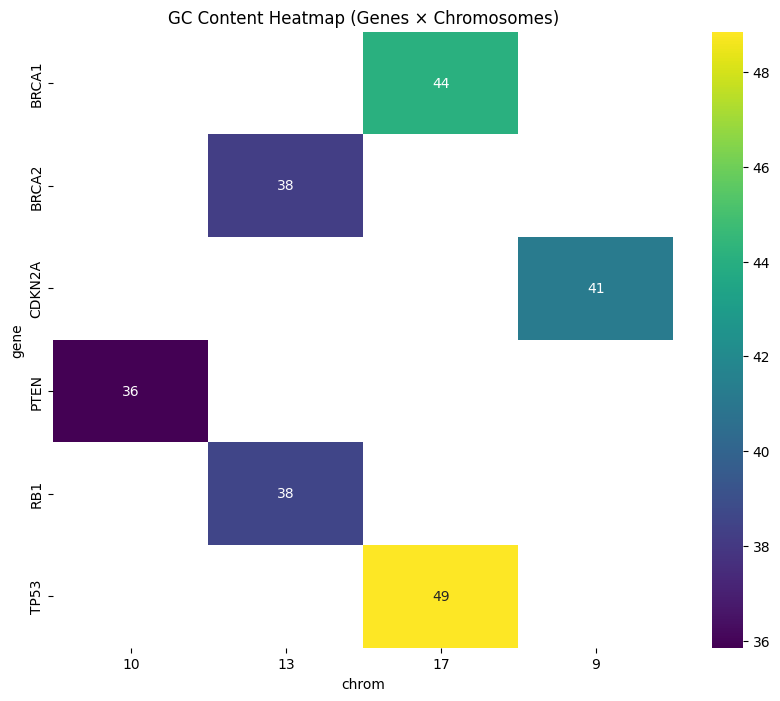

In [11]:
gene_gc_list = [
    {
        "gene": gene,
        "chrom": gtf_filtered[gtf_filtered["gene_name"] == gene]["chrom"].iloc[0],
        "gc_content": gc_contet(seq)
    }
    for gene, seq in gene_seqs.items()
]

import pandas as pd

gc_df = pd.DataFrame(gene_gc_list)

gc_pivot = gc_df.pivot_table(index='gene', columns='chrom', values='gc_content')
plt.figure(figsize=(10,8))
sns.heatmap(gc_pivot, cmap='viridis', annot=True)
plt.title('GC Content Heatmap (Genes × Chromosomes)')
plt.show()


Shows GC % for a gene on its chromosome, that reflects sequence composition of each gene.
- TP53 on chr17 has a GC content of 49%
- PTEN on chr10 is lower at 36%
- CDKN2A on chr9 is moderately high at 41%
- BRCA1 on chr17 has GC content of 44%
- BRCA2 on chr13 has GC content of 38%

## ORF detection

In [12]:
# define the function to find the ORFs in the forward strand

def find_orfs(seq, min_length=100):
  seq=seq.upper()
  stop_codons=['TAG','TAA','TGA'] # Corrected stop codon 'TAG' instead of 'TAG'
  orfs=[] # empty list to store ORFS

  for frame in range(3):     # 3 forward reading frames
     i=frame
     while i<len(seq)-2: # Ensure the loop only reads complete codons ( 3 bases)/ Enough length  should be in the sequence to create the last valid codon
       codon=seq[i:i+3] # length of a codon
       if codon=='ATG': # define the start codon
         start=i # trigger the begining of the transaltion when the current codon is a  start codon
         j=i+3 # sacns forward in steps of 3 until it reaches a stop codon
         while j< len(seq)-2: # Corrected len(seq-2) to len(seq)-2
          next_codon=seq[j:j+3]
          if next_codon in stop_codons and (j-start)%3==0: # foud a valid stop codon # Corrected stop-codons to stop_codons
            end=j+3 # end the sequence
            orf_seq=seq[start:end] #define the ORf based on start and end positions of the sequence # Corrected orf_sseq to orf_seq
            if len(orf_seq)>=min_length:
              orfs.append({ "frame": frame + 1,
                                "start": start,
                                "end": end,
                                "length": end - start,
                                "sequence": orf_seq
                            })
              break
          j+=3 # moves the inner loop forward by one codon, keeps scanning for stop codons until one is found in-frame.
       i+=3 # moves the outer loop by 3 codons to scan next start codon # Corrected indentation
  return orfs

To ensure capturing the all biologocally valid coding regions.

In [13]:
## Reverse complpement ORF detection

from Bio.Seq import Seq

def find_orfs_both_strands(seq,min_length=100):
  orfs=[]

  orfs +=find_orfs(seq,min_length) # forward strand

  rev_seq = seq.reverse_complement() # complement strand
  rev_orfs= find_orfs(rev_seq,min_length)

  # Tage reverse strand ORFs
  for orf in rev_orfs:
    orf['strand']= "-"
  for orf in orfs:
    orf['strand']= "+"

  return orfs + rev_orfs


In [14]:
# Store ORF results for each gene
orf_results = {}

# Detect ORFs on both strands
from Bio.Seq import Seq

for gene, seq in gene_seqs.items():
    # Convert string sequence to Seq object
    seq_obj = Seq(seq)
    all_orfs = find_orfs_both_strands(seq_obj, min_length=150)
    orf_results[gene] = all_orfs

# Display results
for gene, orfs in orf_results.items():
    print(f"\n🧬 {gene}: Found {len(orfs)} ORFs (forward + reverse)")

    if orfs:
        # Show top 3 longest ORFs
        sorted_orfs = sorted(orfs, key=lambda x: x["length"], reverse=True)
        print(" Top 3 longest ORFs:")
        for idx, orf in enumerate(sorted_orfs[:3]):
            print(f"    ORF {idx+1}: Strand {orf['strand']}, Frame {orf['frame']}, Start {orf['start']}, End {orf['end']}, Length {orf['length']}")

      # Show all ORFs
        #print("All detected ORFs:")
        #for orf in orfs:
            #print(f" Frame: {orf['frame']}, Strand: {orf['strand']}, Start: {orf['start']}, End: {orf['end']}, Length: {orf['length']}")
    else:
        print(" No ORFs found (minimum length 150).")

    print("-" * 40)


🧬 CDKN2A: Found 912 ORFs (forward + reverse)
 Top 3 longest ORFs:
    ORF 1: Strand +, Frame 2, Start 322, End 1237, Length 915
    ORF 2: Strand -, Frame 3, Start 2789, End 3614, Length 825
    ORF 3: Strand +, Frame 3, Start 18395, End 19145, Length 750
----------------------------------------

🧬 PTEN: Found 3959 ORFs (forward + reverse)
 Top 3 longest ORFs:
    ORF 1: Strand -, Frame 1, Start 71679, End 72789, Length 1110
    ORF 2: Strand +, Frame 3, Start 938, End 1973, Length 1035
    ORF 3: Strand +, Frame 3, Start 1013, End 1973, Length 960
----------------------------------------

🧬 RB1: Found 10997 ORFs (forward + reverse)
 Top 3 longest ORFs:
    ORF 1: Strand +, Frame 1, Start 164694, End 167013, Length 2319
    ORF 2: Strand +, Frame 1, Start 165072, End 167013, Length 1941
    ORF 3: Strand +, Frame 1, Start 165393, End 167013, Length 1620
----------------------------------------

🧬 BRCA2: Found 2913 ORFs (forward + reverse)
 Top 3 longest ORFs:
    ORF 1: Strand +, Fram

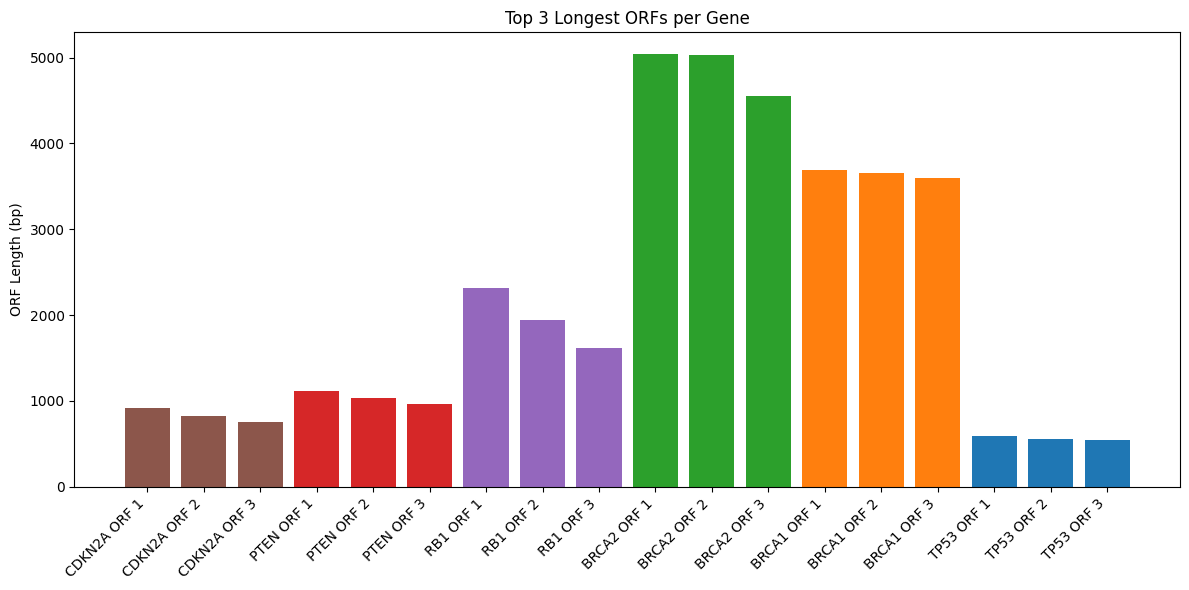

In [15]:
import matplotlib.pyplot as plt

# Prepare data
gene_labels = []
orf_lengths = []
bar_colors = []

# Optional: assign a unique color per gene
gene_colors = {
    "TP53": "#1f77b4",
    "BRCA1": "#ff7f0e",
    "BRCA2": "#2ca02c",
    "PTEN": "#d62728",
    "RB1": "#9467bd",
    "CDKN2A": "#8c564b"
}

# Extract top 3 longest ORFs per gene
for gene, orfs in orf_results.items():
    top_orfs = sorted(orfs, key=lambda x: x["length"], reverse=True)[:3]
    for i, orf in enumerate(top_orfs, start=1):
        gene_labels.append(f"{gene} ORF {i}")
        orf_lengths.append(orf["length"])
        bar_colors.append(gene_colors.get(gene, "#333333"))

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(gene_labels, orf_lengths, color=bar_colors)
plt.xticks(rotation=45, ha='right')
plt.ylabel("ORF Length (bp)")
plt.title("Top 3 Longest ORFs per Gene")
plt.tight_layout()
plt.show()


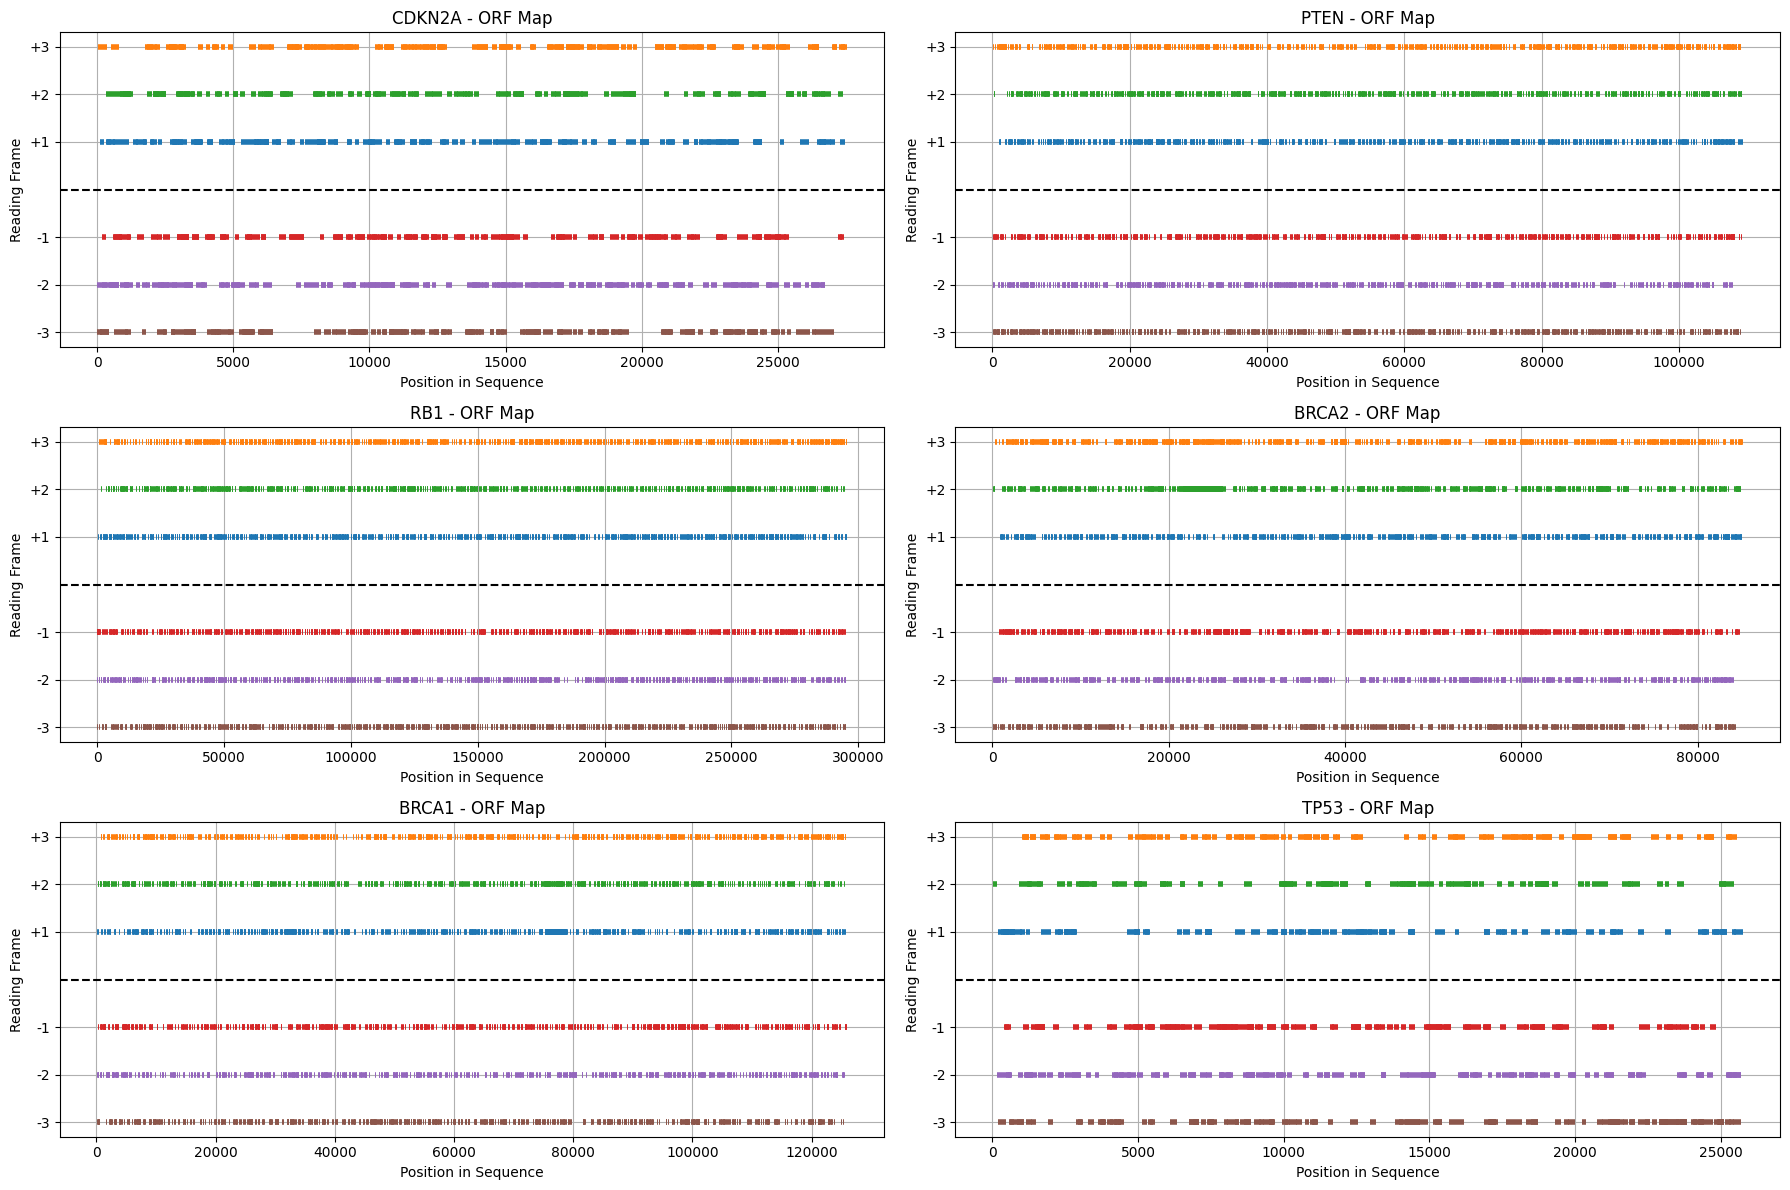

In [16]:
import matplotlib.pyplot as plt

# Define color palette for frames
colors = {
    "+": {1: "#1f77b4", 2: "#2ca02c", 3: "#ff7f0e"},
    "-": {1: "#d62728", 2: "#9467bd", 3: "#8c564b"}
}

# Create subplots for each gene
fig, axes = plt.subplots(3, 2, figsize=(18,12))
axes = axes.flatten()

for idx, (gene, orfs) in enumerate(orf_results.items()):
    ax = axes[idx]

    for orf in orfs:
        start = orf["start"]
        end = orf["end"]
        strand = orf["strand"]
        frame = orf["frame"]
        y = frame if strand == "+" else -frame
        ax.hlines(y, start, end, color=colors[strand][frame], linewidth=4)
        #ax.text((start + end) // 2, y + 0.2, f"{end - start} bp", ha='center', fontsize=7)


    ax.axhline(0, color='black', linestyle='--')
    ax.set_yticks([-3, -2, -1, 1, 2, 3])
    ax.set_yticklabels(["-3", "-2", "-1", "+1", "+2", "+3"])
    ax.set_title(f"{gene} - ORF Map")
    ax.set_xlabel("Position in Sequence")
    ax.set_ylabel("Reading Frame")
    ax.grid(True)

plt.tight_layout()
plt.show()


### Transcription from DNA to RNA & Translaion of mRNA to Protein

The genomic databases provide the coding strand sequence. Although mRNA is synthesized from the templpate strand of the double stranded DNA, the mRNA sequence matches with the coding strand except it uses U( uracil) instead of T(Tyamine) bases. mRNA runs in the direction 5'-> 3' just like the coding DNA strand.

In [17]:
# Identify the strand info for Tumor supressor genes

# List of tumor suppressor genes to check
tumor_genes = ["TP53", "BRCA1", "PTEN","BRCA2","RB1","CDKN2A"]

# Open and parse the GTF file
with open("Homo_sapiens.GRCh38.110.gtf", "rt") as gtf:
    for line in gtf:
        if line.startswith("#"):    # If a comment is in the annotation file skip that line and move to he next ( GTF file often starts witha a comment)
            continue
        fields = line.strip().split("\t")
        feature_type = fields[2]
        strand = fields[6]
        attributes = fields[8]  # metadata like gene name, ID, transcript ID

        # Check if it's a gene entry and matches one of the tumor suppressors
        if feature_type == "gene":
            for gene in tumor_genes:
                if f'gene_name "{gene}"' in attributes:
                    print(f"{gene}: Strand = {strand}")

CDKN2A: Strand = -
PTEN: Strand = +
RB1: Strand = +
BRCA2: Strand = +
BRCA1: Strand = -
TP53: Strand = -


In [18]:
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq

# Define tumor suppressor genes
tumor_suppressors = ["TP53", "BRCA1", "BRCA2", "PTEN", "RB1", "CDKN2A"]

#  Load GTF and filter CDS entries
gtf_path = "Homo_sapiens.GRCh38.110.gtf"
gtf = pd.read_csv(gtf_path, sep="\t", comment="#", header=None,dtype=str)
gtf.columns = ["chrom", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]
gtf["gene_name"] = gtf["attribute"].str.extract('gene_name "([^"]+)"') # Attribute includes metadata like gene name, gene ID, so extractiing only the gene name as a new column in the gtf

# Load genome FASTA
genome_fasta = "Homo_sapiens.GRCh38.dna.primary_assembly.fa"
genome = SeqIO.to_dict(SeqIO.parse(genome_fasta, "fasta"))

# Define transcription and translation functions
def extract_cds_sequence(cds_entries, genome):
    cds_seq = ""
    strand = cds_entries.iloc[0]["strand"]
    for _, row in cds_entries.sort_values(by="start").iterrows():
        chrom = row["chrom"]
        start = int(row["start"]) - 1  # GTF is 1-based
        end = int(row["end"])
        segment = genome[chrom].seq[start:end]
        cds_seq += str(segment)
    if strand == "-":
        cds_seq = str(Seq(cds_seq).reverse_complement())
    return cds_seq   # return the full coding  DNA sequence which is the input for transcription

def transcribe_and_translate(dna_seq):
    mrna = Seq(dna_seq).transcribe()
    protein = mrna.translate(to_stop=True)
    return str(mrna), str(protein)

# Process each tumor suppressor gene
results = {}
for gene in tumor_suppressors:
    cds_entries = gtf[(gtf["feature"] == "CDS") & (gtf["gene_name"] == gene)]
    if cds_entries.empty:
        print(f" No CDS found for {gene}")
        continue
    try:
        cds_seq = extract_cds_sequence(cds_entries, genome)
        mrna_seq, protein_seq = transcribe_and_translate(cds_seq)
        results[gene] = {"mRNA": mrna_seq, "Protein": protein_seq}
    except Exception as e:
        print(f" Error processing {gene}: {e}")

# Display results
for gene, data in results.items():
    print(f"\n {gene}")
    print(f"mRNA: {data['mRNA'][:60]}...")
    print(f"Protein: {data['Protein'][:60]}...")


/usr/local/lib/python3.12/dist-packages/Bio/Seq.py:2877: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(



 TP53
mRNA: AUGGAGGAGCCGCAGUCAGAUCCUAGCGUCGAGCCCCCUCUGAGUCAGGAAACAUUUUCA...
Protein: MEEPQSDPSVEPPLSQETFSDLWKLWRSRSQILASSPL...

 BRCA1
mRNA: AUGGAUGGAUUUAUCUGCUCUUCGCGUUGAAGAAGUACAAAAUGUCAUUAAUGCUAUGCA...
Protein: MDGFICSSR...

 BRCA2
mRNA: AUGCCUAUUGGAUCCAAAGAGAGGCCAACAUUUUUUGAAAUUUUUAAGACACGCUGCAAC...
Protein: MPIGSKERPTFFEIFKTRCNKADAYWIQREANIF...

 PTEN
mRNA: CUGGAGCGGGGGGGAGAAGCGGCGGCGGCGGCGGCCGCGGCGGCUGCAGCUCCAGGGAGG...
Protein: LERGGEAAAAAAAAAAAPGRGSESPVTISRAGNAGELVSPLLLPPTRRRRRRHIQGPGPV...

 RB1
mRNA: AUGCCGCCCAAAACCCCCCGAAAAACGGCCGCCACCGCCGCCGCUGCCGCCGCGGAACCC...
Protein: MPPKTPRKTAATAAAAAAEPPAPPPPPPPEEDPEQDSGPEDLPLVRCRPKPPEKRPPPPP...

 CDKN2A
mRNA: AUGGUGCGCAGGUUCUUGGUGACCCUCCGGAUUCGGCGCGCGUGCGGCCCGCCGCGAGUG...
Protein: MVRRFLVTLRIRRACGPPRVRVFVVHIPRLTGEWAAPGAPAAVALVLMLLRSQRLGQQPL...


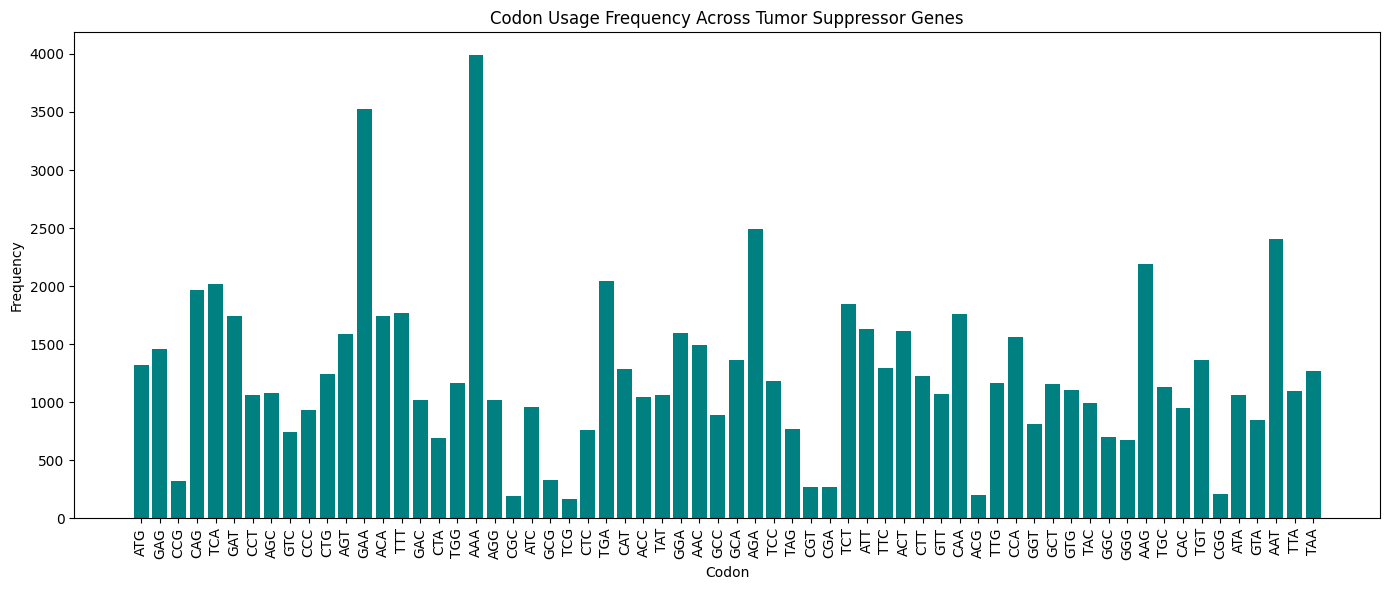

In [20]:
## Visualize codon Frequency ( Transcription Insights)

import matplotlib.pyplot as plt
from collections import Counter

# Codon frequency across all mRNA sequences
codon_freq = Counter()

for gene, data in results.items():
    mrna = data["mRNA"].replace("U", "T")  # Convert RNA to DNA codons
    codons = [mrna[i:i+3] for i in range(0, len(mrna)-2, 3)]
    codon_freq.update(codons)

# Plot codon frequency
plt.figure(figsize=(14, 6))
codon_labels, codon_counts = zip(*codon_freq.items())
plt.bar(codon_labels, codon_counts, color='teal')
plt.xticks(rotation=90)
plt.xlabel("Codon")
plt.ylabel("Frequency")
plt.title("Codon Usage Frequency Across Tumor Suppressor Genes")
plt.tight_layout()
plt.show()


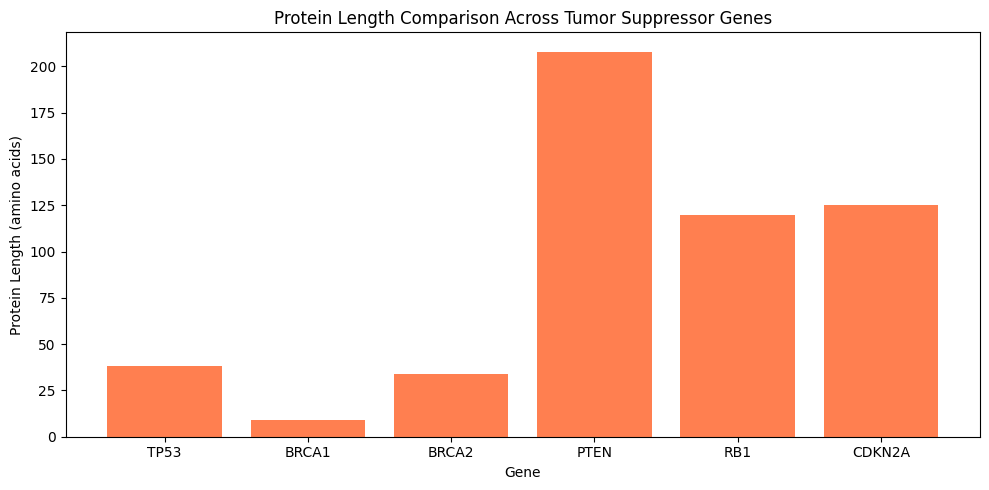

In [21]:
# Protein length per gene
genes = list(results.keys())
protein_lengths = [len(results[gene]["Protein"]) for gene in genes]

# Plot protein lengths
plt.figure(figsize=(10, 5))
plt.bar(genes, protein_lengths, color='coral')
plt.xlabel("Gene")
plt.ylabel("Protein Length (amino acids)")
plt.title("Protein Length Comparison Across Tumor Suppressor Genes")
plt.tight_layout()
plt.show()

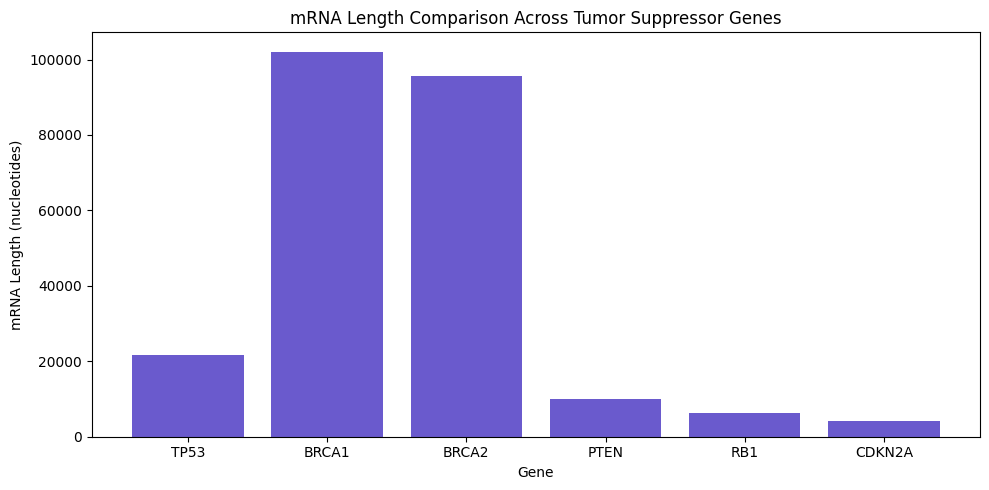

In [22]:
# mRNA length per gene
mrna_lengths = [len(results[gene]["mRNA"]) for gene in genes]

# Plot mRNA lengths
plt.figure(figsize=(10, 5))
plt.bar(genes, mrna_lengths, color='slateblue')
plt.xlabel("Gene")
plt.ylabel("mRNA Length (nucleotides)")
plt.title("mRNA Length Comparison Across Tumor Suppressor Genes")
plt.tight_layout()
plt.show()